In [179]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
# 1. 표본추출 
# 단순 임의 추출법(복원, 비복원) : 각 개체에 번호를 부여하여 랜덤하게 n개를 추출하는 방법으로 모든 개체는 선택될 확률이 동일하다.
# 층화추출법 : 모집단이 이질적인 몇 개의 계층으로 이루어져 있을 때 모든 계층으로부터 원소를 임의로 추출하여 각 계층을 고루 대표할 수 있도록 랜덤하게 표본을 추출하는 방법이다. 

# 1-1) 단순 임의 추출법
import pandas as pd
df = pd.read_csv('data/iris.csv')
print(len(df))
df_sample_1 = df.sample(frac = 0.7,  replace = True, random_state = 2022 ) # n (개수추출), frac(비율추출), replace(True-복원, False-비복원)
print(len(df_sample_1))
# 1-2) 층화 임의 추출법
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, stratify=df['target'], test_size=0.3, shuffle = True, random_state = 2022 ) # Shuffle(True-무작위, False-순차적)
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=df['target'], test_size=0.3, random_state = 2022  )
print(X_train['target'].value_counts())
print(X_test['target'].value_counts())

C:\Users\KDB\AppData\Local\Temp\ipykernel_66620\161804867.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


150
105
Iris-versicolor    35
Iris-setosa        35
Iris-virginica     35
Name: target, dtype: int64
Iris-virginica     15
Iris-setosa        15
Iris-versicolor    15
Name: target, dtype: int64


## 2. 불균형 데이터 처리 

* 기출문제 22회 

> 1-2-1 업 샘플링 과정 설명하고 결과 작성 <br> <br>
> * 답안<br> 
> 데이터 세트의 균형을 맞추기 위해 업 샘플링을 적용할 수 있다. <br>
> 대표적으로 랜덤 오버샘플링과 KNN을 이용한 SMOTE기법이 있다. <br>
> 1) 랜덤오버샘플링은 소수 클래스의 정보를 복제하여 다수 클래스의 크기에 맞추는 기법이며, 이는 오버피팅의 우려가 있다. <br>
> 2) SMOTE는 KNN을 이용하여 최근접 이웃의 거리 계산을 통해 K개의 중간 지점의 데이터를 생성한다. 오버피팅을 막을 수 있으나, 새로운 데이터나 작은 데이터셋에서는 사용하기가 어렵다. <br>
<br>

> 1-2-2 언더 샘플링 과정 설명하고 결과 작성 <br> <br>
> * 답안 <br> 
> 언더 샘플링은 다수 데이터를 소수 데이터의 크기에 맞추는 기법이다. <br>
> 랜덤 샘플링을 통해 소수의 클래스로 만드는 과정에서 데이터의 손실이 발생하는 문제가 있을 수 있다. 
> 소수 클래스의 크기가 너무 작을 경우 머신러닝 과정에서의 과소적합이 발생할 수 있다. 

> 1-2-3 둘 중 선택하고 이유 설명 <br> <br>
> * 해당 데이터에서 소수 클래스의 수는 50개이고 다수 클래스의 데이터는 700행이다. <br>
간단하게 RandomForestClassifier에 해당 데이터를 학습시켜본 결과 언더샘플링 기법을 이용한 결과가 불균형 데이터를 사용한 결과보다 더 안좋음을 알 수 있었고, SMOTE기법을 사용했을 때, 가장 좋은 결과를 도출해낼 수 있었다.  <br>
> 그러므로 해당 데이터에서 오버샘플링을 선택하였다. 


* 기출문제 23회 

> 1-2-1 데이터에 불균형이 있는지 확인, 불균형 판단 근거 작성  <br> <br>
> 1-2-2 오버샘플링 방법들 중 2개 선택하고 장단점 등 선정 이유 제시  <br> <br>
> 1-2-3 오버샘플링 수행 및 결과, 잘 되었다는 것을 판단해라  <br>

* 정리 
> 매개변수 조절에 따라 클래스의 어느정도의 분균형은 성능에 영향을 미치지 않는다. <br> <br>
> 결국 데이터 불균형 처리는 평가지표를 개선시킬 수 있는가?(ROC_AUC 등)에 초점 <br> <br>
> 분류분석, 알고리즘 선택 > 불균형/언더/오버 > 평가지표(ROC_AUC) 비교 > 알맞은 샘플링 기법 판단 <br> <br>
> ROC_AUC값이 애매하다면 다시 돌려서 확실한 결과를 보여주는 것이 좋다. + randomState 지정 <br> <br>
> 머신러닝 문제는 뻔함. 데이터 전처리, 전처리 과정 설명(언더,스케일러) - 20분 내 작성 필요 <br> <br>

1    560
0    240
Name: credit.rating, dtype: int64 560.0 240.0
1    140
0     60
Name: credit.rating, dtype: int64 140.0 60.0
X_train.shape :  (800, 20)
y_train.sahpe :  (800,)
X_test.shpae :  (200, 20)
y_test.shape :  (200,)
X_resampled.shape :  (1120, 20)
y_resampled.shape :  (1120,)


<BarContainer object of 2 artists>

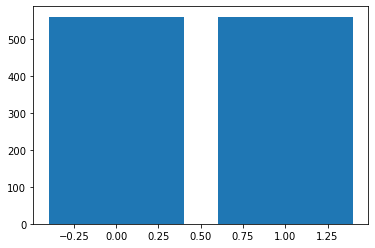

In [24]:
# 2-1) 오버샘플링
# - 소수 클래스의 샘플을 증가시켜 마이너 클래스와 메이저 클래스의 샘플 크기를 동일하게 만드는 기법 
# - 랜덤 오버샘플링(소수 샘플 복제)은 동일한 정보를 복사하여 오버피팅을 유발할 수 있음 

# SMOTE(Synthetic Minority Over-sampling Technique)
# - 소수 클래스의 기존 샘플을 사용하여 새로운 합성 관찰을 생성 하는 오버 샘플링 기법 소수 클래스에 대한 선형 보간법으로 가상 훈련 기록을 생성. 
# - 합성 훈련 기록은 소수 클래스의 각 예에 대해 k-최근접 이웃 중 하나 이상을 무작위로 선택하여 생성.(소수 인스턴스와 인접점 중간에 새로운 데이터 생성)
# - 오버샘플링 과정을 거친 후 데이터를 재구성하고 처리된 데이터에 대해 여러 분류 모델을 적용할 수 있음
# - 데이터의 특성에 따라 다르겠지만, 빅데이터 분석을 위해서는 많은 데이터 확보가 효과적이므로 오버샘플링 기법을 적용하는 것이 좋음.
# - 기존의 데이터가 적은 새로운 사례의 데이터에서 사용하기 어려움.

import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('data/credit_final.csv')
X = df.drop(['credit.rating'], axis = 1)
y = df['credit.rating'] # 1 : 700, 0 : 300 

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 2022)
# 전체 1000개 중 train : 800, test : 200
# train/test 내 데이터는 7(1) : 3(0)  비율 
print(y_train.value_counts(),  (800*7/10), (800*3/10)) 
print(y_test.value_counts(), (200*7/10), (200*3/10))

# 1인 클래스 기준으로 0을 SMOTE를 활용한 오버샘플링
from imblearn.over_sampling import SMOTE
# SMOTE 적절한 K을 찾기가 어려움(GridSearchCV)
smote = SMOTE(k_neighbors=5)
# train데이터를 넣어 복제함
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print('X_train.shape : ' , X_train.shape)
print('y_train.sahpe : ' , y_train.shape)
print('X_test.shpae : '  , X_test.shape)
print('y_test.shape : ', y_test.shape)
print('X_resampled.shape : ', X_resampled.shape)
print('y_resampled.shape : ', y_resampled.shape)

import matplotlib.pyplot as plt
plt.bar(y_resampled.value_counts().index, y_resampled.value_counts().values)

1    700
0    300
Name: credit.rating, dtype: int64
Int64Index([1, 0], dtype='int64')
[700 300]
1000  ,  1000
600  ,  600


<BarContainer object of 2 artists>

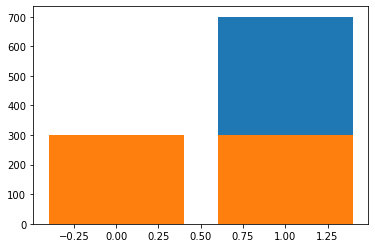

In [10]:
# 2-2) 언더샘플링
# - 다수 클래스의 샘플을 소수 클래스의 분포 비율과 일치하도록 무작위로 제거함.
# - 2개의 클래스의 비율을 맞추기 위해 귀중한 정보를 잃어버리고 편향될 수 있기 때문에 작은 데이터에서는 선호되지 않음
# - 오버 샘플링보다 언더 샘플링이 비용이 더 적게 듬 
# - 다수의 부정적인 클래스 일부를 줄이는 것이 허용됨 
# - 긍정 클래스의 정보가 많다면 언더샘플링을 하는 경향이 있음 
# - 어느정도 소수 클래스의 개수가 충족이 된다면, 언더샘플링 전의 ROC_AUC 값이 더 높을 수 있다.
# - 클래스의 분균형 차이가 심하면, 언더샘플링 고려 필요
# - 꼭 1:1 로 맞췄다고 성능이 좋아지진 않는다.
import pandas as pd

df = pd.read_csv('data/credit_final.csv')
X = df.drop(['credit.rating'], axis = 1)
y = df['credit.rating']

import matplotlib.pyplot as plt
print(y.value_counts())
print(y.value_counts().index)
print(y.value_counts().values)
print(len(X), ' , ' , len(y))
plt.bar(y.value_counts().index, y.value_counts().values ) # 0인 클래스 개수가 1인 클래스 개수보다 작다.

# 0인 클래스 기준으로 1을 언더샘플링
import imblearn.under_sampling.base
from imblearn.under_sampling import RandomUnderSampler
X_resampled, y_resampled = RandomUnderSampler(random_state = 0).fit_resample(X,y)
print(len(X_resampled), ' , ' , len(y_resampled))
plt.bar(y_resampled.value_counts().index, y_resampled.value_counts().values)

# > y에서 1클래스가 700개에서 300개로 감소 (전체 1000개중 400개 감소하여 600개)
# > X역시 400개 감소하여 600개

## 3. 데이터 표준화, 정규화
sklearn에서는 다양한 종류의 스케일러를 제공함 

* <b>데이터 변환이 필요한 이유 </b>
- 데이터의 단위와 평균과 표준편차가 모두 다르다면, 우리가 학습시키는 머신이 그 단위를 인지하지 못함 
- 즉, 우리는 머신에 학습을 시킬 때, 유사한 단위를 맞춰 줘야 합니다. 
- 또한 통계는 표본집단의 평균과 분산으로 모집단의 분산을 설명하는 학문인데, 차원마다 범위가 다르면, 스케일이 큰 집단의 영향을 많이 받습니다. 그렇기 때문에 차원의 스케일을 맞춰줄 필요가 있습니다. 

In [53]:
# 3-1) StandardScaler(표준화, 표준정규분표, 평균 = 0, 분산 = 1)
# 기본 스케일. 평균과 표준편차 사용 
# 평균을 0, 분산을 1로 모든 데이터를 변환하는 방법 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('data/iris.csv')
standardScaler = StandardScaler()
print(df)

df_scaled = pd.DataFrame(standardScaler.fit_transform(df[['sepal length', 'sepal width', 'petal length', 'petal width']])
                         , columns = df.columns[0:4] + "_scaled")
print(df_scaled)

# 각 컬럼별로 스케일 적용
# 원본 : 5.1
print('sepal length.mean() : ' , df['sepal length'].mean()) # 5.84
print('sepal length.var() : ' , df['sepal length'].var()) # 0.68
print('sepal length.sd() : ' ,np.sqrt(df['sepal length'].var())) # 0.82
print((5.1-5.84) / 0.82) # (x-u) / s

     sepal length  sepal width  petal length  petal width          target
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]
     sepal length_scaled  sepal width_scaled  petal length_scaled  \
0              -0.9

In [68]:
# 3-2) MinMaxScaler(정규화)
# 최대/최소값이 각각 1, 0이 되도록 스케일링
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('data/iris.csv')
minMaxScaler = MinMaxScaler()
df_scaled = pd.DataFrame(minMaxScaler.fit_transform(df[['sepal length', 'sepal width', 'petal length', 'petal width']]), columns = df.columns[0:4]+"_scaled")
df_scaled
      
# 각 컬럼별로 스케일 적용
# 원본 : 5.1
print('sepal length.mean() : ' , df['sepal length'].mean()) # 5.84
print('sepal length.var() : ' , df['sepal length'].var()) # 0.68
print('sepal length.sd() : ' ,np.sqrt(df['sepal length'].var())) # 0.82
print('sepal length.min() : ', df['sepal length'].min())
print('sepal length.max() : ', df['sepal length'].max())
print((5.1 - 4.3) / (7.9 - 4.3)) # 0.22222222 > 전체 차이(최대값-최소값) 중에 해당 부분의 차이(해당값-최소값)은 어느정도 차지하는가?

sepal length.mean() :  5.843333333333335
sepal length.var() :  0.6856935123042505
sepal length.sd() :  0.8280661279778629
sepal length.min() :  4.3
sepal length.max() :  7.9
0.22222222222222213


In [70]:
# 3-3) MaxAbsScaler
# 이 추정기는 훈련 세트에 있는 각 기능의 최대 절대값이 1이 되도록 각 기능을 개별적으로 확장하고 변환합니다.
# 데이터를 이동/중앙에 배치하지 않으므로 희소성을 파괴하지 않습니다.
from sklearn.preprocessing import MaxAbsScaler

maxAbsScaler = MaxAbsScaler()
df_scaled = pd.DataFrame(maxAbsScaler.fit_transform(df[['sepal length', 'sepal width', 'petal length', 'petal width']]), columns = df.columns[0:4]+"_scaled")
print(df_scaled['sepal length_scaled'].min())
print(df_scaled['sepal length_scaled'].max())
df_scaled

0.5443037974683543
1.0


,sepal length_scaled,sepal width_scaled,petal length_scaled,petal width_scaled
0,0.645570,0.795455,0.202899,0.08
1,0.620253,0.681818,0.202899,0.08
2,0.594937,0.727273,0.188406,0.08
3,0.582278,0.704545,0.217391,0.08
4,0.632911,0.818182,0.202899,0.08
...,...,...,...,...
145,0.848101,0.681818,0.753623,0.92
146,0.797468,0.568182,0.724638,0.76
147,0.822785,0.681818,0.753623,0.80
148,0.784810,0.772727,0.782609,0.92


In [91]:
# 3-4) RobustScaler
# 중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화
# 이상값에 대해 강력한 통계를 사용하여 기능을 확장합니다.
# 이 스케일러는 중앙값을 제거하고 분위수 범위(기본값은 IQR: 사분위수 범위)에 따라 데이터를 조정합니다. 
# IQR은 1사분위수(25분위수)와 3사분위수(75분위수) 사이의 범위입니다.
# 데이터 세트의 표준화는 많은 기계 학습 추정기의 공통 요구 사항입니다. 
# > 일반적으로 이것은 평균을 제거하고 단위 분산으로 스케일링하여 수행됩니다. 
# > 그러나 이상치는 종종 표본 평균/분산에 부정적인 영향을 미칠 수 있습니다. 
# > 이러한 경우 중앙값과 사분위수 범위가 더 나은 결과를 제공하는 경우가 많습니다.

import pandas as pd
from sklearn.preprocessing import RobustScaler

df = pd.read_csv('data/iris.csv')
roburstScaler = RobustScaler()
df.loc[3, 'sepal length'] = 50 # 임의로 이상치로 변경
df
df_scaled = pd.DataFrame(roburstScaler.fit_transform(df[['sepal length', 'sepal width', 'petal length', 'petal width']]), columns = df.columns[0:4]+"_scaled")
print(df_scaled['sepal length_scaled'].min())
print(df_scaled['sepal length_scaled'].max())
print(df.describe(), '\n')
print(df_scaled.describe()) # 스케일 전보다는 분산을 줄여줌


-1.1538461538461533
33.999999999999986
       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       6.146000     3.054000      3.758667     1.198667
std        3.697172     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max       50.000000     4.400000      6.900000     2.500000 

       sepal length_scaled  sepal width_scaled  petal length_scaled  \
count           150.000000          150.000000         1.500000e+02   
mean              0.266154            0.108000        -1.689524e-01   
std               2.843978            0.867189         5.041201e-01   
min              -1.153846           -2.000000        -9.571429e-01   
25%              -0.538462           -0.400000        -7.857143e

In [112]:
# 4. 결측치, 이상치 처리하기
# 4-1) 결측치 인식
import pandas as pd
import numpy as np
df = pd.read_csv('data/airquality.csv')
print(df.isnull() , '\n')
print(df.isna(), '\n')

print(df.isnull().sum(), '\n')
print(df.isna().sum(),'\n')

print(df['Ozone'].isnull().value_counts(), '\n')
print(df[df['Ozone'].isnull() == True], '\n')

# 4-2) 결측치가 하나라도 있는 행 저장
df_isnull = df[df.isnull().any(axis = 1)] # 행이지만 1
print(df_isnull,'\n')

# 4-3) 결측치가 하나라도 있는 행 삭제
df_dropna = df_isnull.dropna()
print(df_dropna, '\n')

     Ozone  Solar.R   Wind   Temp  Month    Day
0    False    False  False  False  False  False
1    False    False  False  False  False  False
2    False    False  False  False  False  False
3    False    False  False  False  False  False
4     True     True  False  False  False  False
..     ...      ...    ...    ...    ...    ...
148  False    False  False  False  False  False
149   True    False  False  False  False  False
150  False    False  False  False  False  False
151  False    False  False  False  False  False
152  False    False  False  False  False  False

[153 rows x 6 columns] 

     Ozone  Solar.R   Wind   Temp  Month    Day
0    False    False  False  False  False  False
1    False    False  False  False  False  False
2    False    False  False  False  False  False
3    False    False  False  False  False  False
4     True     True  False  False  False  False
..     ...      ...    ...    ...    ...    ...
148  False    False  False  False  False  False
149   True    

#### 4-4)  결측치 대치법 이해
<b>가.</b> 단순 대치법
* complete analysis : 결측값이 존재하는 행 삭제
* 평균 대치법 : 관측 또는 실험을 통해 얻어진 데이터의 평균으로 결측치 대치
* 단순확률 대치법 : Hot-deck 방법, nearest neighbor 방법 등
    
<b>나.</b> 다중 대치법
* 단순 대치법을 m번 수행해 m개의 가상적 완전 자료를 만듦
* [대치] - [분석] - [결합] 단계

#### 결측치 제거
* 결측치가 존재하는 행/열 제거
   
<div style="font-weight: bold; font-size: 120%; margin-left:30px"> 
    <table align="left" margin:50 font-size: 120%>
        <tr>
            <td style="text-align: left;">데이터명.dropna()</td>
            <td style="text-align: left;">행 기준으로 결측치가 있는 행은 모두 삭제</td>
        </tr>
        <tr>
            <td style="text-align: left;">데이터명.dropna(axis=1)</td>
            <td style="text-align: left;">열 기준으로 결측치가 있는 열은 모두 삭제</td>
        </tr>
        <tr>
            <td style="text-align: left;">데이터명.dropna(how='all')</td>
            <td style="text-align: left;">행 전체가 결측값인 행만 삭제</td>
        </tr>
        <tr>
            <td style="text-align: left;">데이터명.dropna(thresh=2)</td>
            <td style="text-align: left;">결측치의 갯수 수치를 지정해서 임계치를 넘어가면 삭제</td>
        </tr>
        <tr>
            <td style="text-align: left;">데이터명.dropna(subset=['컬럼명1', '컬럼명2'])</td>
            <td style="text-align: left;">특정 컬럼 내의 결측치만 삭제</td>
        </tr>
        <tr>
            <td style="text-align: left;">데이터명.dropna(inplace=True)</td>
            <td style="text-align: left;">결측치 제거한 상태를 바로 적용</td>
        </tr>
    </table>
</div>

#### 결측치 대치법
* 해당 변수 값들을 특정 값으로 대치함
<div style="font-weight: bold; font-size: 120%; margin-left:30px"> 
    <table align="left" margin:50 font-size: 120%>
        <tr>
            <td style="text-align: left;">데이터명.fillna(0)</td>
            <td style="text-align: left;">결측값을 0으로 대체</td>
        </tr>
        <tr>
            <td style="text-align: left;">데이터명.fillna(method='ffill 또는 'pad')</td>
            <td style="text-align: left;">결측값을 앞방향으로 채워나감</td>
        </tr>
        <tr>
            <td style="text-align: left;">데이터명.fillna(method='bfill' 또는 'backfill')</td>
            <td style="text-align: left;">결측값을 뒷 방향으로 채워나감</td>
        </tr>
        <tr>
            <td style="text-align: left;">데이터명.fillna(method='ffill', limit=1)</td>
            <td style="text-align: left;">앞/뒤 방향으로 결측값을 채우는 횟수를 1번으로 제한</td>
        </tr>
        <tr>
            <td style="text-align: left;">데이터명.fillna(데이터명.mean())</td>
            <td style="text-align: left;">결측값을 변수별 평균으로 대체</td>
        </tr>
        <tr>
            <td style="text-align: left;">데이터명.dropna(inplace=True)</td>
            <td style="text-align: left;">결측치 제거한 상태를 바로 적용</td>
        </tr>
        <tr>
            <td style="text-align: left;">데이터명.fillna(데이터명.median())</td>
            <td style="text-align: left;">결측치를 중앙값으로 대체</td>
        </tr>
        <tr>
            <td style="text-align: left;">데이터명['컬럼명'].describe()['top']</td>
            <td style="text-align: left;">범주형 변수 열의 최빈값으로 결측치를 대체</td>
        </tr>
    </table>
</div>

In [131]:
# airquality의 Ozone 변수값이 존재하지 않는 경우, Ozone 변수 값들의 평균으로 대치하기
df = pd.read_csv('data/airquality.csv')
print(df.isnull().sum(), '\n')
df['Ozone'] = df['Ozone'].fillna(df['Ozone'].mean())
print(df.isnull().sum())

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64 

Ozone      0
Solar.R    7
Wind       0
Temp       0
Month      0
Day        0
dtype: int64


In [132]:
# 4-5) 사이킷런을 활용한 결측치 대치 - KNN
import pandas as pd
from sklearn.impute import KNNImputer
df = pd.read_csv('data/airquality.csv')
print(df.isnull().sum(), '\n')
knnImputer = KNNImputer(n_neighbors = 5)
df_knnImputer = knnImputer.fit_transform(df)
df_knnImputer = pd.DataFrame(df_knnImputer, columns = df.columns)
print(df_knnImputer.isnull().sum(), '\n')

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64 

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64 



outlier_index :  Int64Index([61, 116], dtype='int64')
outlier_index_2 :  Int64Index([98], dtype='int64')


<AxesSubplot:xlabel='Ozone'>

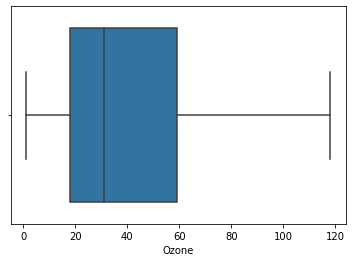

In [160]:
# 5. 이상치인식
# 5-1) BoxPlot으로 df['Ozone'] 데이터 이상치 인식
import seaborn as sns
import pandas as pd
df = pd.read_csv('data/airquality.csv')
#sns.boxplot(x = 'Ozone', data = df)

# 5-2) 이상치 탐색 함수

def detect_outlier(df = None, column = None, weight = 1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    IQR = Q3-Q1
    IQR_weight = IQR * weight
    
    outlier_index = df[(df[column] < Q1 - IQR_weight) | (df[column] > Q3 + IQR_weight)].index # 괄호필요
    
    return outlier_index

# 5-3) df['Ozone'] 데이터 이상치 탐색
outlier_index = detect_outlier(df=df, column='Ozone')
print('outlier_index : ', outlier_index)
    
# 5-4) df에 적용
df.loc[outlier_index, 'outlier'] = True
df[df['outlier'] == True]

# 5-5) outlier 값 평균으로 대치
df.loc[df['outlier'] == True, 'Ozone'] = df['Ozone'].mean()

# 5-6) BoxPlot 재확인
# sns.boxplot(x = 'Ozone', data = df) # 평균으로 대치해도, 재계산 후 이상치 다시 출력

# 5-7) 이상치 제거
outlier_index_2 = detect_outlier(df, 'Ozone')
print('outlier_index_2 : ', outlier_index_2)
df = df.drop(outlier_index_2, axis = 0).reset_index(drop = True)

# 5-8) BoxPlot 재확인
sns.boxplot(x = 'Ozone', data = df)


In [177]:
# 6. 범주형 변수 변환
# 연속형 변수 : 수치형 변수 
# 범주형 변수 : 이산형 혹은 category 등 
# 범주형 변수를 표현하는 데 가장 널리 쓰이는 방법 : <b>원-핫-인코딩</b>(one-hot-encoding)
# 범주형 변수에 있는 원소를 columns로 변경 -> 해당 범주에 속하면 1, 아니면 0 으로 채우는 기법 

import pandas as pd
df = pd.read_csv('data/titanic.csv')
df.drop(['pclass', 'embark_town'], axis = 1, inplace = True)
df # 범주형변수 : sex, embarked, class  / adult_male : boolean으로 변환 필요 X
print(df.columns, '\n')
# 6-1) 전체 컬럼 중 일부 범주형 변수 변환
df_dummies = pd.get_dummies(df, columns = ['sex', 'embarked', 'class']) # df에는 일부 컬럼만 추가가능하다 ex) df['sex','embarked', 'class']
df_dummies
print(df_dummies.columns, '\n')

# 6-2) isIn ? df_dummies에는 있지만 df에 없는 컬럼을 df에 붙여서 0값을 넣어주기 
# 전.isin.후 : '전'이 '후'를 포함하고 있나?
columns = df_dummies.columns [df_dummies.columns.isin(df.columns) == False]
df[columns] = 0
df

Index(['survived', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class',
       'adult_male'],
      dtype='object') 

Index(['survived', 'age', 'sibsp', 'parch', 'fare', 'adult_male', 'sex_female',
       'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S', 'class_First',
       'class_Second', 'class_Third'],
      dtype='object') 



,survived,sex,age,sibsp,parch,fare,embarked,class,adult_male,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third
0,0,male,22.0,1,0,7.2500,S,Third,True,0,0,0,0,0,0,0,0
1,1,female,38.0,1,0,71.2833,C,First,False,0,0,0,0,0,0,0,0
2,1,female,26.0,0,0,7.9250,S,Third,False,0,0,0,0,0,0,0,0
3,1,female,35.0,1,0,53.1000,S,First,False,0,0,0,0,0,0,0,0
4,0,male,35.0,0,0,8.0500,S,Third,True,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,male,27.0,0,0,13.0000,S,Second,True,0,0,0,0,0,0,0,0
887,1,female,19.0,0,0,30.0000,S,First,False,0,0,0,0,0,0,0,0
888,0,female,NaN,1,2,23.4500,S,Third,False,0,0,0,0,0,0,0,0
889,1,male,26.0,0,0,30.0000,C,First,True,0,0,0,0,0,0,0,0


#### 7.  변수 축소 (주성분분석)

<br>
<b>가.</b> 주성분분석의 개념<br>

* 주성분분석이란 데이터에 여러 변수들이 있을 때, 서로 상관성이 높은 변수들의 선형결합으로 이루어진 "주성분"이라는 새로운 변수를 만들어 변수들을 요약하고 축소하는 기법 
<br>
<br>

<b>나.</b>  파이썬을 이용한 주성분 분석
* 변수간의 스케일이 차이가 나면 스케일 큰 변수가 주성분에 영향을 많이 주기 때문에 주성분 분석 전에 변수를 표준화나 
  정규화시켜주는 것이 좋다. 데이터 표준화에 사용하는 함수는 StandardScaler()이다. 
* 파이썬에서 주성분분석을 수행할 수 있는 기본적인 함수는 sklearn의 PCA함수이다. 
* pca.explained_variance_ratio_를 통해서 또는 Scree Plot으로 주성분의 설명력을 확인 할 수 있다. 
* PCA함수는 공분산행렬의 고유벡터를 구하는 방법을 사용한다. 

<b>다.</b>  차원의 저주
* 데이터 용량이 커질수록 불필요한 샘플 증가 현상이 일어남 
* 과도한 정보를 훈련시키면 부정확하고 잘못된 모델이 탄생할 가능성이 증가함 
* 차원 축소로 해결 가능 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


고유 값 :  [20.89551896 11.75513248  4.7013819   1.75816839]
분산 설명력 :  [0.72770452 0.23030523 0.03683832 0.00515193]
Scree plot 후 분산 설명력 :  [0.72770452 0.23030523]


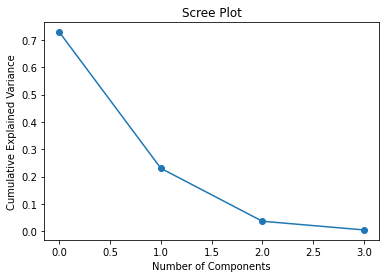

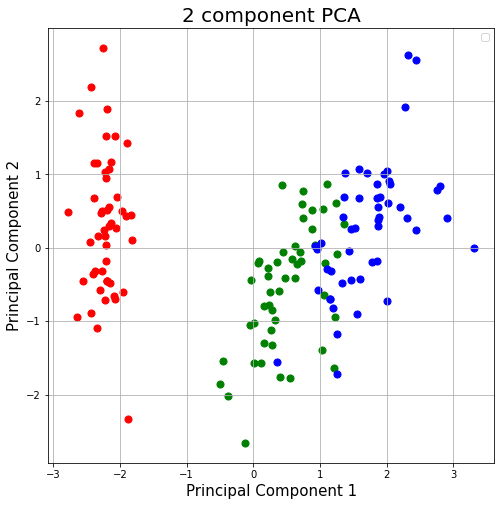

In [190]:
# 7. 변수축소
import pandas as pd
df = pd.read_csv('data/iris.csv')
# 7-1) 수치형 변수 추출
features = ['sepal length','sepal width', 'petal length', 'petal width']
df_list = df.loc[:, features].values

# 7-2) 수치형 변수 Scale
from sklearn.preprocessing import StandardScaler
df_list_scaled = StandardScaler().fit_transform(df_list)

# 7-3) PCA 분석
from sklearn.decomposition import PCA
## Scree Plot 으로 주성분 개수 정하는 방법 
before_pca = PCA().fit(df_list_scaled)
print("고유 값 : ",before_pca.singular_values_)
print("분산 설명력 : ", before_pca.explained_variance_ratio_)

# 7-4) Scree plot
import matplotlib.pyplot as plt
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(before_pca.explained_variance_ratio_,'o-')

# 7-5) Scree plot으로 결정된 n_componets로 PCA 재분석
after_pca = PCA(n_components=2) #PCA 객체 생성 (주성분 갯수 2개 생성)
principalComponents = after_pca.fit_transform(df_list_scaled) ## 주성분 2개 객체에 할당 
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component1', 'principal component2']) 
print("Scree plot 후 분산 설명력 : ", after_pca.explained_variance_ratio_)

# 7-5) 
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize=20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df['target'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component1']
               , principalDf.loc[indicesToKeep, 'principal component2']
               , c = color
               , s = 50)
ax.legend()
ax.grid()